<a href="https://colab.research.google.com/github/santiagoec/CM0891-Aprendizaje-Automatico/blob/master/01_Ingenieria_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingeniería de caracteristicas en Python

Este libro contiene un estudio de ingeniería de caracteristicas utilizando Python. Esto hace parte del curso de Aprendizaje Automático de la Maestría de Ciencia de Datos.

Los integrantes de este trabajo:

* Santiago Echeverri Calderon
* Edgar Leandro Jimenez Jaimes

Este libro se encuentra organizado de la siguiente manera:

1.   Lectura de los datos y exploración inicial
2.   Ingenieria de caracteristicas utilizando Feature Tools
3.   Ingenieria de caracteristicas enfoque 2 
4.   Evaluación de desemepeño de modelos clasificadores con diferentes atributos del dataset







Vamos a instalar las librerias necesarias para la ejecución de este libro

In [0]:
#!pip install featuretools

Realizamos la importación de las librerias a utilizar

In [2]:
import pandas as pd
import numpy as np
import featuretools as ft
from featuretools.primitives import *
from featuretools.variable_types import Numeric
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Realizamos la carga del data set a utilizar:

El conjunto de datos a utilizar es Heart disease prediction, este es un dataset de un estudio cardiovascular en curso en los residentes de la ciudad de Framingham, Massachusetts. 

El objetivo de la clasificación es predecir si el paciente tiene riesgo de enfermedad coronaria en los próximos 10 años. El conjunto de datos proporciona la información del paciente. Incluye más de 4,000 registros y 15 atributos.  Existen factores de riesgo demográficos, conductuales y médicos.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/CM0891-Aprendizaje-Automatico/Datasets/Heart disease prediction.csv')

# Exploracion inicial del conjunto de datos

Realizamos una pequeña revision de los datos que acabamos de importar

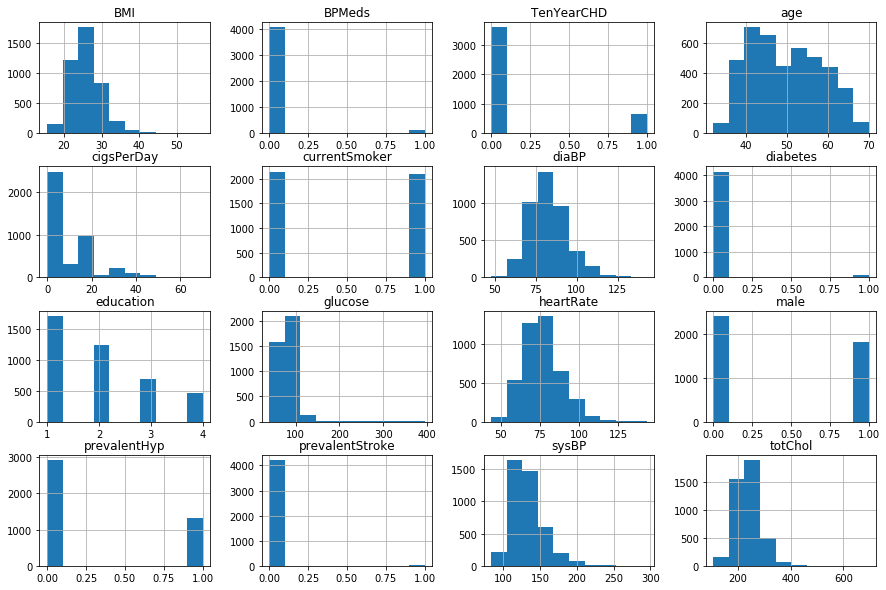

In [5]:
df.hist(figsize=(15, 10))
plt.show()

In [6]:
print(df.columns.values)  # Observamos el nombre de las columnas que contiene  el dataset

['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose' 'TenYearCHD']


In [7]:
df.info()                 # Revisamos el tipo de datos por cada columna    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
df.head(5)                # Imprimimos los primeros 5 registros del dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df.describe()           # Realizamos una estadistica descriptiva rapida del conjunto de datos

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


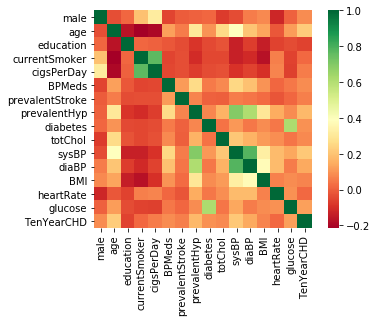

In [10]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')  # Revisamos rapidamente la matriz de correlacion

Vamos a revisar la calidad de los datos

In [11]:
df.isna().sum() # Revisamos cuantos NA tiene la información

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Vamos a eliminar los registros que contengan valores NA o nulos para efectos de modelación. En este libro no se va a realizar ningun tipo de imputación de datos ya que nos vamos a enfocar en la ingeniería de caracteristicas.

In [12]:
# Tamaño inicial del dataset
df.shape

(4238, 16)

In [13]:
# Eliminamos los registros con NA
df = df.dropna()

# Tamaño luego de retirar registros con NA
df.shape

(3656, 16)

# Ingenieria de caracteristicas utilizando `feature_tools`

Como punto de partida vamos a realizar la creación de nuevos atributos en el dataset a partir de las variables que ya tenemos actualmente. Para esto vamos a utilizar la librería `feature_tools` la cual crea de manera automatica los nuevos atributos utilizando agregación.

In [14]:
# Resetear el indice despues del borrado de los missing values
df2 = df.reset_index(drop=True)
df2.reset_index(inplace=True)
df2.head(3)

,index,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


#### Creación de la entidad para generación de nuevos atributos


In [15]:
es = ft.EntitySet(id = 'heart_disease_data') # Almacena todos los datos reales para un conjunto de entidades

es = es.entity_from_dataframe(entity_id = 'df2', 
                              dataframe = df2.drop(['TenYearCHD'], 
                                                   axis=1),
                              variable_types = 
                              {
                                  'male': ft.variable_types.Boolean,
                                  'age': ft.variable_types.Numeric,
                                  'education': ft.variable_types.Ordinal,
                                  'currentSmoker': ft.variable_types.Boolean,
                                  'cigsPerDay': ft.variable_types.Numeric,
                                  'BPMeds': ft.variable_types.Boolean,
                                  'prevalentStroke': ft.variable_types.Boolean,
                                  'prevalentHyp': ft.variable_types.Boolean,
                                  'diabetes': ft.variable_types.Boolean,
                                  'totChol': ft.variable_types.Numeric,
                                  'sysBP': ft.variable_types.Numeric,
                                  'diaBP': ft.variable_types.Numeric,
                                  'BMI': ft.variable_types.Numeric,
                                  'heartRate': ft.variable_types.Numeric,
                                  'glucose': ft.variable_types.Numeric,
                              }, 
                              index = 'index')

es

Entityset: heart_disease_data
  Entities:
    df2 [Rows: 3656, Columns: 16]
  Relationships:
    No relationships

In [16]:
# normaliza_entity crea una nueva entidad y relación a partir de valores únicos de una variable existente.
es = es.normalize_entity(base_entity_id='df2', new_entity_id='male', index='male')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='education', index='education')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='currentSmoker', index='currentSmoker')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='prevalentStroke', index='prevalentStroke')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='prevalentHyp', index='prevalentHyp')
es = es.normalize_entity(base_entity_id='df2', new_entity_id='diabetes', index='diabetes')
es

Entityset: heart_disease_data
  Entities:
    df2 [Rows: 3656, Columns: 16]
    male [Rows: 2, Columns: 1]
    education [Rows: 4, Columns: 1]
    currentSmoker [Rows: 2, Columns: 1]
    prevalentStroke [Rows: 2, Columns: 1]
    prevalentHyp [Rows: 2, Columns: 1]
    diabetes [Rows: 2, Columns: 1]
  Relationships:
    df2.male -> male.male
    df2.education -> education.education
    df2.currentSmoker -> currentSmoker.currentSmoker
    df2.prevalentStroke -> prevalentStroke.prevalentStroke
    df2.prevalentHyp -> prevalentHyp.prevalentHyp
    df2.diabetes -> diabetes.diabetes

Ahora vamos a utiliza Deep Feature Synthesis (DFS) que es un método automatizado para realizar ingeniería de características en datos relacionales y temporales. La salida de esta ejecución son las nuevas caracteristicas y sus nombres.

In [0]:
features, feature_names = ft.dfs(entityset = es,           
                                 target_entity = 'df2',
                                 trans_primitives=[ft.primitives.Percentile],   
                                 max_depth = 2)           

In [18]:
features.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,PERCENTILE(age),PERCENTILE(cigsPerDay),PERCENTILE(totChol),PERCENTILE(sysBP),PERCENTILE(diaBP),PERCENTILE(BMI),PERCENTILE(heartRate),PERCENTILE(glucose),male.SUM(df2.age),male.SUM(df2.cigsPerDay),male.SUM(df2.totChol),male.SUM(df2.sysBP),male.SUM(df2.diaBP),male.SUM(df2.BMI),male.SUM(df2.heartRate),male.SUM(df2.glucose),male.STD(df2.age),male.STD(df2.cigsPerDay),male.STD(df2.totChol),male.STD(df2.sysBP),male.STD(df2.diaBP),male.STD(df2.BMI),male.STD(df2.heartRate),male.STD(df2.glucose),male.MAX(df2.age),...,diabetes.MAX(df2.diaBP),diabetes.MAX(df2.BMI),diabetes.MAX(df2.heartRate),diabetes.MAX(df2.glucose),diabetes.SKEW(df2.age),diabetes.SKEW(df2.cigsPerDay),diabetes.SKEW(df2.totChol),diabetes.SKEW(df2.sysBP),diabetes.SKEW(df2.diaBP),diabetes.SKEW(df2.BMI),diabetes.SKEW(df2.heartRate),diabetes.SKEW(df2.glucose),diabetes.MIN(df2.age),diabetes.MIN(df2.cigsPerDay),diabetes.MIN(df2.totChol),diabetes.MIN(df2.sysBP),diabetes.MIN(df2.diaBP),diabetes.MIN(df2.BMI),diabetes.MIN(df2.heartRate),diabetes.MIN(df2.glucose),diabetes.MEAN(df2.age),diabetes.MEAN(df2.cigsPerDay),diabetes.MEAN(df2.totChol),diabetes.MEAN(df2.sysBP),diabetes.MEAN(df2.diaBP),diabetes.MEAN(df2.BMI),diabetes.MEAN(df2.heartRate),diabetes.MEAN(df2.glucose),diabetes.COUNT(df2),diabetes.PERCENT_TRUE(df2.BPMeds),diabetes.NUM_UNIQUE(df2.male),diabetes.NUM_UNIQUE(df2.education),diabetes.NUM_UNIQUE(df2.currentSmoker),diabetes.NUM_UNIQUE(df2.prevalentStroke),diabetes.NUM_UNIQUE(df2.prevalentHyp),diabetes.MODE(df2.male),diabetes.MODE(df2.education),diabetes.MODE(df2.currentSmoker),diabetes.MODE(df2.prevalentStroke),diabetes.MODE(df2.prevalentHyp)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0.111461,0.255607,0.167123,0.067287,0.124316,0.663156,0.685585,0.466493,80003,21804.0,378584.0,212876.0,135605.0,42360.01,120334.0,132903.0,8.542779,13.761522,41.103254,19.406784,11.508911,3.390656,11.627529,24.317237,69,...,142.5,56.8,143.0,163.0,0.251562,1.223848,0.533887,1.177512,0.692505,0.975017,0.674399,0.988822,32,0.0,113.0,83.5,48.0,15.54,44.0,40.0,49.401743,9.095586,236.51729,131.99002,82.810655,25.723843,75.608659,79.403992,3557,0.028957,2,4,2,2,2,0,1.0,0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0.398113,0.255607,0.644830,0.336023,0.470596,0.802653,0.930799,0.427243,101179,11181.0,487424.0,271061.5,167521.5,51906.97,156537.0,166363.0,8.573273,8.739338,46.168321,23.986809,12.308748,4.516267,12.122018,23.586245,70,...,142.5,56.8,143.0,163.0,0.251562,1.223848,0.533887,1.177512,0.692505,0.975017,0.674399,0.988822,32,0.0,113.0,83.5,48.0,15.54,44.0,40.0,49.401743,9.095586,236.51729,131.99002,82.810655,25.723843,75.608659,79.403992,3557,0.028957,2,4,2,2,2,0,1.0,0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0.472374,0.802790,0.603255,0.480170,0.422867,0.494393,0.517232,0.216220,80003,21804.0,378584.0,212876.0,135605.0,42360.01,120334.0,132903.0,8.542779,13.761522,41.103254,19.406784,11.508911,3.390656,11.627529,24.317237,69,...,142.5,56.8,143.0,163.0,0.251562,1.223848,0.533887,1.177512,0.692505,0.975017,0.674399,0.988822,32,0.0,113.0,83.5,48.0,15.54,44.0,40.0,49.401743,9.095586,236.51729,131.99002,82.810655,25.723843,75.608659,79.403992,3557,0.028957,2,4,2,2,2,0,1.0,0,0,0


In [19]:
print('El nuevo numero de atributos que con tiene el dataset es de',len(feature_names))

El nuevo numero de atributos que con tiene el dataset es de 383


In [20]:
#Podemos observar el nombre de las columnas que fueron creadas mediante: 

feature_names


[<Feature: male>,
 <Feature: age>,
 <Feature: education>,
 <Feature: currentSmoker>,
 <Feature: cigsPerDay>,
 <Feature: BPMeds>,
 <Feature: prevalentStroke>,
 <Feature: prevalentHyp>,
 <Feature: diabetes>,
 <Feature: totChol>,
 <Feature: sysBP>,
 <Feature: diaBP>,
 <Feature: BMI>,
 <Feature: heartRate>,
 <Feature: glucose>,
 <Feature: PERCENTILE(age)>,
 <Feature: PERCENTILE(cigsPerDay)>,
 <Feature: PERCENTILE(totChol)>,
 <Feature: PERCENTILE(sysBP)>,
 <Feature: PERCENTILE(diaBP)>,
 <Feature: PERCENTILE(BMI)>,
 <Feature: PERCENTILE(heartRate)>,
 <Feature: PERCENTILE(glucose)>,
 <Feature: male.SUM(df2.age)>,
 <Feature: male.SUM(df2.cigsPerDay)>,
 <Feature: male.SUM(df2.totChol)>,
 <Feature: male.SUM(df2.sysBP)>,
 <Feature: male.SUM(df2.diaBP)>,
 <Feature: male.SUM(df2.BMI)>,
 <Feature: male.SUM(df2.heartRate)>,
 <Feature: male.SUM(df2.glucose)>,
 <Feature: male.STD(df2.age)>,
 <Feature: male.STD(df2.cigsPerDay)>,
 <Feature: male.STD(df2.totChol)>,
 <Feature: male.STD(df2.sysBP)>,
 <Featu

In [21]:
features[features['currentSmoker'] == 1][["currentSmoker.SKEW(df2.age)","age","currentSmoker"]].head()

,currentSmoker.SKEW(df2.age),age,currentSmoker
index,,,
2,0.503753,48,1
3,0.503753,61,1
4,0.503753,46,1
7,0.503753,45,1
9,0.503753,43,1


In [22]:
features[features['currentSmoker'] == 0][["currentSmoker.SKEW(df2.age)","age","currentSmoker"]].head()

,currentSmoker.SKEW(df2.age),age,currentSmoker
index,,,
0,-0.038574,39,0
1,-0.038574,46,0
5,-0.038574,43,0
6,-0.038574,63,0
8,-0.038574,52,0


#### Selección de atributos según colinealidad

Vamos analizar la matriz de correlacion mediante el coeficiente de pearson. En este punto se debe definir un umbral para definir con que variables me puedo quedar buscando reducir el numero inicial.

In [23]:
# Umbral para remover variables
threshold = 0.95

# Matriz de correlación en valor absoluto
corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,PERCENTILE(age),PERCENTILE(cigsPerDay),PERCENTILE(totChol),PERCENTILE(sysBP),PERCENTILE(diaBP),PERCENTILE(BMI),PERCENTILE(heartRate),PERCENTILE(glucose),male.SUM(df2.age),male.SUM(df2.cigsPerDay),male.SUM(df2.totChol),male.SUM(df2.sysBP),male.SUM(df2.diaBP),male.SUM(df2.BMI),male.SUM(df2.heartRate),male.SUM(df2.glucose),male.STD(df2.age),male.STD(df2.cigsPerDay),male.STD(df2.totChol),male.STD(df2.sysBP),male.STD(df2.diaBP),male.STD(df2.BMI),male.STD(df2.heartRate),male.STD(df2.glucose),male.MAX(df2.age),...,diabetes.MAX(df2.diaBP),diabetes.MAX(df2.BMI),diabetes.MAX(df2.heartRate),diabetes.MAX(df2.glucose),diabetes.SKEW(df2.age),diabetes.SKEW(df2.cigsPerDay),diabetes.SKEW(df2.totChol),diabetes.SKEW(df2.sysBP),diabetes.SKEW(df2.diaBP),diabetes.SKEW(df2.BMI),diabetes.SKEW(df2.heartRate),diabetes.SKEW(df2.glucose),diabetes.MIN(df2.age),diabetes.MIN(df2.cigsPerDay),diabetes.MIN(df2.totChol),diabetes.MIN(df2.sysBP),diabetes.MIN(df2.diaBP),diabetes.MIN(df2.BMI),diabetes.MIN(df2.heartRate),diabetes.MIN(df2.glucose),diabetes.MEAN(df2.age),diabetes.MEAN(df2.cigsPerDay),diabetes.MEAN(df2.totChol),diabetes.MEAN(df2.sysBP),diabetes.MEAN(df2.diaBP),diabetes.MEAN(df2.BMI),diabetes.MEAN(df2.heartRate),diabetes.MEAN(df2.glucose),diabetes.COUNT(df2),diabetes.PERCENT_TRUE(df2.BPMeds),diabetes.NUM_UNIQUE(df2.male),diabetes.NUM_UNIQUE(df2.education),diabetes.NUM_UNIQUE(df2.currentSmoker),diabetes.NUM_UNIQUE(df2.prevalentStroke),diabetes.NUM_UNIQUE(df2.prevalentHyp),diabetes.MODE(df2.male),diabetes.MODE(df2.education),diabetes.MODE(df2.currentSmoker),diabetes.MODE(df2.prevalentStroke),diabetes.MODE(df2.prevalentHyp)
male,NaN,0.024387,0.017677,0.206778,0.331243,0.052128,0.002308,0.000806,0.013833,0.070229,0.045484,0.051575,0.072867,0.114923,0.003048,0.025557,0.293369,0.062646,0.016627,0.060492,0.133687,0.109910,0.008361,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,NaN,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,0.013833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013833
age,NaN,NaN,0.158961,0.210862,0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,0.002685,0.118245,0.995399,0.213860,0.282360,0.383919,0.204394,0.144740,0.005987,0.114511,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,0.024387,...,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,NaN,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,0.109027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109027
education,NaN,NaN,NaN,0.025253,0.013527,0.013647,0.030353,0.079100,0.039547,0.012956,0.124511,0.058502,0.137280,0.064254,0.031874,0.157904,0.019756,0.016147,0.126958,0.063628,0.129753,0.061659,0.022233,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,0.017677,...,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,NaN,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,0.039547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039547
currentSmoker,NaN,NaN,NaN,NaN,0.773819,0.051936,0.038159,0.107561,0.041859,0.051119,0.134371,0.115748,0.159574,0.050452,0.053346,0.208766,0.933314,0.051421,0.134703,0.122450,0.165854,0.058640,0.077470,0.206778,0.206778,0.206778,0.20677

In [24]:
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)] # Columnas con correlación por encima del umbral

print('Hay  %d variables a remover.' % (len(collinear_features)))

Hay  290 variables a remover.


In [25]:
features_filtered = features.drop(columns = collinear_features) # Realizamos el filtro de las columnas que vamos a retirar

print('El número de variables que quedan es: ', features_filtered.shape[1])

El número de variables que quedan es:  93


In [26]:
features_filtered.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,PERCENTILE(cigsPerDay),PERCENTILE(sysBP),PERCENTILE(BMI),PERCENTILE(glucose),male.MAX(df2.glucose),male.MIN(df2.cigsPerDay),male.MIN(df2.sysBP),male.MIN(df2.glucose),male.NUM_UNIQUE(df2.education),male.NUM_UNIQUE(df2.currentSmoker),male.NUM_UNIQUE(df2.prevalentStroke),male.NUM_UNIQUE(df2.prevalentHyp),male.NUM_UNIQUE(df2.diabetes),male.MODE(df2.education),male.MODE(df2.prevalentStroke),male.MODE(df2.prevalentHyp),male.MODE(df2.diabetes),education.STD(df2.age),education.STD(df2.cigsPerDay),education.STD(df2.totChol),education.STD(df2.glucose),education.MAX(df2.age),education.MAX(df2.cigsPerDay),education.MAX(df2.totChol),education.MAX(df2.glucose),...,currentSmoker.NUM_UNIQUE(df2.male),currentSmoker.NUM_UNIQUE(df2.education),currentSmoker.NUM_UNIQUE(df2.prevalentStroke),currentSmoker.NUM_UNIQUE(df2.prevalentHyp),currentSmoker.NUM_UNIQUE(df2.diabetes),currentSmoker.MODE(df2.education),currentSmoker.MODE(df2.prevalentStroke),currentSmoker.MODE(df2.prevalentHyp),currentSmoker.MODE(df2.diabetes),prevalentStroke.MIN(df2.cigsPerDay),prevalentStroke.NUM_UNIQUE(df2.male),prevalentStroke.NUM_UNIQUE(df2.currentSmoker),prevalentStroke.NUM_UNIQUE(df2.prevalentHyp),prevalentStroke.NUM_UNIQUE(df2.diabetes),prevalentStroke.MODE(df2.male),prevalentStroke.MODE(df2.education),prevalentStroke.MODE(df2.currentSmoker),prevalentStroke.MODE(df2.diabetes),prevalentHyp.MAX(df2.glucose),prevalentHyp.MIN(df2.cigsPerDay),prevalentHyp.MIN(df2.glucose),prevalentHyp.NUM_UNIQUE(df2.male),prevalentHyp.NUM_UNIQUE(df2.education),prevalentHyp.NUM_UNIQUE(df2.currentSmoker),prevalentHyp.NUM_UNIQUE(df2.prevalentStroke),prevalentHyp.NUM_UNIQUE(df2.diabetes),prevalentHyp.MODE(df2.male),prevalentHyp.MODE(df2.education),prevalentHyp.MODE(df2.prevalentStroke),prevalentHyp.MODE(df2.diabetes),diabetes.MIN(df2.cigsPerDay),diabetes.NUM_UNIQUE(df2.male),diabetes.NUM_UNIQUE(df2.education),diabetes.NUM_UNIQUE(df2.currentSmoker),diabetes.NUM_UNIQUE(df2.prevalentStroke),diabetes.NUM_UNIQUE(df2.prevalentHyp),diabetes.MODE(df2.male),diabetes.MODE(df2.education),diabetes.MODE(df2.currentSmoker),diabetes.MODE(df2.prevalentStroke)
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0.255607,0.067287,0.663156,0.466493,394.0,0.0,83.5,40.0,4,2,2,2,2,1.0,0,0,0,8.285730,12.417844,40.351822,16.024154,67,60.0,382.0,183.0,...,2,4,2,2,2,1.0,0,0,0,0.0,2,2,2,2,0,1.0,0,0,394.0,0.0,40.0,2,4,2,2,2,0,1.0,0,0,0.0,2,4,2,2,2,0,1.0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0.255607,0.336023,0.802653,0.427243,394.0,0.0,83.5,40.0,4,2,2,2,2,1.0,0,0,0,8.296487,11.817173,46.493689,22.116877,70,60.0,600.0,394.0,...,2,4,2,2,2,1.0,0,0,0,0.0,2,2,2,2,0,1.0,0,0,394.0,0.0,40.0,2,4,2,2,2,0,1.0,0,0,0.0,2,4,2,2,2,0,1.0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0.802790,0.480170,0.494393,0.216220,394.0,0.0,83.5,40.0,4,2,2,2,2,1.0,0,0,0,8.414159,12.035009,43.073275,25.261233,69,60.0,432.0,386.0,...,2,4,2,2,2,1.0,0,0,0,0.0,2,2,2,2,0,1.0,0,0,394.0,0.0,40.0,2,4,2,2,2,0,1.0,0,0,0.0,2,4,2,2,2,0,1.0,0,0


#### Detectar las características más relevantes utilizando los pesos de un clasificador SVM lineal

Los pasos que vamos a seguir en este apartado son los siguientes:

* Paso 1: Generar conjunto de datos descriptores y de variable target
* Paso 2: Escalar los datos (Función)
* Paso 3: Partición de datos en train y testeo (Función)
* Paso 4: OverSamplig sobre datos de entrenamiento para balenceo de clases (Función)
* Paso 5: Ejecución del modelo SVM para detectar caracteristicas



In [27]:
features_positive = features_filtered.loc[:, features_filtered.ge(0).all()] # Revisamos que las columnas sean positivas
features_positive.shape

(3656, 92)

In [0]:
# Paso 1: Generamos dos conjuntos, uno con la varible a clasificar y otro con las descriptoras

y = df2['TenYearCHD'].values # Variable target
X = features_positive        # Variables descriptoras con nuevas caracteristicas

Vamos a revisar cuantos registros tenemos pertencientes a la clase que queremos clasificar. Sabemos que hay mas registros de una clase que de otra, por lo cual debemos balancear la clases para realizar el entrenamiento.

In [29]:
print(sorted(Counter(y).items()))

[(0, 3099), (1, 557)]


Ahora vamos a realizar una tecnica de oversampling para los datos de entrenamiento, de tal manera que contemos con la misma cantindad de clases y se pueda entrenar el modelo. Para ello utilizaremos la funcion `SMOTE` de la librería `imblearn.over_sampling`

In [0]:
# Funcion para generar X, y como se necesitan acorde al problema

def pre_proc(X,y,test_size = 0.2):
  colnames = X.columns.values
  scaler = MinMaxScaler()                    # Utilizamos min max escaler
  scaled_X = scaler.fit_transform(X)         # Ejecutamos el escalado
  df_scaled_X = pd.DataFrame(scaled_X)       # Convertimos a dataframe
  df_scaled_X.columns = colnames             # Nombre de columnas 


  # particion de los datos ahora escalados
  train_X, test_X, train_y, test_y = train_test_split(df_scaled_X,y, 
                                                      test_size = test_size, 
                                                      stratify=y)

  #  oversampling para el conjunto de entrenamiento

  sm = SMOTE(sampling_strategy='auto')             # Instanciamos la función
  X_res, y_res = sm.fit_resample(train_X, train_y) # La ejecutamos sobre nuestros datos de train
  return train_X, test_X, train_y, test_y, X_res, y_res 


In [0]:
train_X, test_X, train_y, test_y, X_res, y_res = pre_proc(X,y)

In [32]:
# Observemos el numero de registros por clases
print(sorted(Counter(y_res).items()))

[(0, 2479), (1, 2479)]


Como se observa, luego de realizar el oversampling ahora contamos con la misma cantidad de registros de clase 0 y de clase 1 para nuestros datos de entrenamiento. 

In [33]:
#  Paso 5 :Configurar modelo svm
lsvc = LinearSVC(C=1,                              # Parámetro de regularización, este parametro se dejo como viene por defecto de la libreria
                 penalty="l1",                     # utilziamos regularizacion L1 para seleccion de caracteristicas 
                 max_iter = 20000,                 # Numero maximo de iteracion        
                 dual=False).fit(X_res, y_res) 

# Configurar modelo de selección de variables

model = SelectFromModel(lsvc, prefit=True)        # Meta-transformador para seleccionar características basadas en pesos de importancia.
X_new = model.transform(X_res)
X_selected_df = pd.DataFrame(X_new, columns=[train_X.columns[i] for i in range(len(train_X.columns)) if model.get_support()[i]])
print('Ahora hay %d variables que vamos a tener en cuenta.' % X_selected_df.shape[1])

Ahora hay 22 variables que vamos a tener en cuenta.


Este nuevo resultado es obtenido luego correr el modelo SVM con regularización L1 el cual nos dio como resultado las caracteristicas mas relevantes


In [34]:
# Hacemos este proceso para los datos de testeo
X_new_test = model.transform(test_X)
X_selected_df_test = pd.DataFrame(X_new_test, columns=[test_X.columns[i] for i in range(len(test_X.columns)) if model.get_support()[i]])
X_selected_df_test.shape

(732, 22)

In [35]:
lsvc.coef_ # Esta sentencia nos imprime el valor de los coeficientes

array([[ 2.27484835e-01,  1.19961957e+00, -8.62249832e-02,
        -2.86210294e-01, -6.48692554e-01,  2.74766579e-02,
         1.06099448e-02,  1.71616932e-01, -2.70944200e-01,
         3.19661492e-01,  1.36286241e+00, -2.18081867e-01,
         3.02647471e-01, -3.69117436e-01,  2.04606239e+00,
         1.02974291e+00,  1.67194144e-03, -8.56397068e-03,
        -2.77057125e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.31586164e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.28459373e-02,
        -6.31923008e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [36]:
print('El numero de caracteristicas ANTES de ejecutar el modelo SVM con regularización es de', X_res.shape[1])
print('El nuevo numero de caracteristicas DESPUES de ejecutar el modelo SVM con regularización es de',X_new.shape[1])

El numero de caracteristicas ANTES de ejecutar el modelo SVM con regularización es de 92
El nuevo numero de caracteristicas DESPUES de ejecutar el modelo SVM con regularización es de 22


In [37]:
# Observemos que variables quedaron
X_selected_df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,PERCENTILE(cigsPerDay),PERCENTILE(sysBP),PERCENTILE(BMI),PERCENTILE(glucose),education.STD(df2.totChol),education.MAX(df2.totChol),education.MAX(df2.glucose)
0,1.0,0.894737,0.000000,1.0,0.285714,0.0,0.0,1.0,0.0,0.236140,0.494090,0.846561,0.340281,0.404040,0.076271,0.735073,0.974689,0.853899,0.140394,0.443099,0.229358,0.962085
1,1.0,0.184211,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.250513,0.172577,0.338624,0.283325,0.181818,0.132768,0.000000,0.313723,0.687688,0.761084,1.000000,1.000000,1.000000
2,0.0,0.500000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.357290,0.262411,0.465608,0.531750,0.313131,0.096045,0.000000,0.691339,0.985499,0.342638,0.443099,0.229358,0.962085


In [38]:
print('Las variables que quedaron luego del proceso de regularización fueron',X_selected_df.columns.values)

Las variables que quedaron luego del proceso de regularización fueron ['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose' 'PERCENTILE(cigsPerDay)' 'PERCENTILE(sysBP)'
 'PERCENTILE(BMI)' 'PERCENTILE(glucose)' 'education.STD(df2.totChol)'
 'education.MAX(df2.totChol)' 'education.MAX(df2.glucose)']


Lo que vamos a realizar ahora es una prueba con dos clasificadores utilizando dos enfoques, el primero es utilizando el conjunto de datos original, es decir sin niguna ingenieria de caracteristicas y el segundo enfoque es utilizando el nuevo conjunto de datos que dio como resultado todo el proceso de caracteristicas


# Ingenieria de caracteristicas utilizando un enfoque mixto

En este enfoque vamos a tener como punto de partida un solucion del reto de Kaggle el cual utiliza un Backward Elimination con un enfoque desde el P-Value para la seleccion de unas caracteristicas, posteriormente vamos a crear nuevas caracteristicas con las mejores variables utilizando feature tools y luego evaluamos el desempeño de los modelos con este nuevo Dataset.

Fuente de solución con P-Value: https://www.kaggle.com/dileep070/logistic-regression

## Solución propuesta por Kaggle - Backward Elimination como ingeniería de caracteristicas

In [0]:
df3 = df.copy()

df3.rename(columns={'male':'Sex_male'},inplace=True) # Renombramos columna
df3.drop(['education'],axis=1,inplace=True)          # Se elimina la columna educacion




In [40]:
# Agregamos un constante al dataset
from statsmodels.tools import add_constant as add_constant

heart_df_constant = add_constant(df3)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Se va realizar el ajuste de una regresión logistica y vamos a revisar el test de chi cuadrado.

Una prueba de Chi-cuadrado se utiliza para determinar la probabilidad de una frecuencia observada de eventos dada una frecuencia esperada

In [41]:
import scipy.stats as st
import statsmodels.api as sm

st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)         # Prueba  

cols=heart_df_constant.columns[:-1]                            # Retiramos varible salida 

model=sm.Logit(df3.TenYearCHD,heart_df_constant[cols])         # Instanciamos regresion logisitca 

result=model.fit()                                             # Ajuste   

result.summary()                                               # Resultado 

Optimization terminated successfully.
         Current function value: 0.376795
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3641
Method:                           MLE   Df Model:                           14
Date:                Fri, 13 Mar 2020   Pseudo R-squ.:                  0.1171
Time:                        23:53:06   Log-Likelihood:                -1377.6
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 2.412e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4895      0.695    -12.221      0.000      -9.851      -7.128
Sex_male            0.5540      0.109      5.082      0.000       0.340       0.768
age                 0.0642      0.007      9.676      0.000       0.051       0.077
currentSmoker       0.0713      0.157      0.455      0.649      -0.236       0.378
cigsPerDay          0.0180      0.006      2.887      0.004       0.006       0.030
BPMeds              0.1576      0.234      0.673      0.501      -0.301       0.616
prevalentStroke     0.7060      0.489      1.444      0.149      -0.253       1.665
prevalentHyp        0.2332      0.138      1.689      0.091      -0.037       0.504
diabetes            0.0430      0.315      0.136      0.892      -0.575       0.661
totChol             0.0023      0.001      2.009      0.045    5.53e-05       0.004
sysBP               0.0157      0.004      4.139      0.000       0.008       0.023
diaBP              -0.0046      0.006     -0.718      0.473      -0.017       0.008
BMI                 0.0081      0.013      0.635      0.525      -0.017       0.033
heartRate          -0.0031      0.004     -0.731      0.465      -0.011       0.005
glucose             0.0071      0.002      3.185      0.001       0.003       0.012
===================================================================================
"""

Seleccion de caracteristicas: Backward elimination (P-value aproximacion): 

Del dataset, se toma la variable targe y una lista de nombres de las columnnas de las variables independientes, luego, se ejecuta regresión repetidamente eliminando caracteristicas con el valor P más alto.

In [0]:
# Funcion para Backward elimination

def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

# Creamos las variables X y Y
X = heart_df_constant.copy()
y = df3.TenYearCHD

# Ejecutamos la funcion
result=back_feature_elem(X,y,cols)

In [43]:
# Interpretando resultados: Odds Ratio, Intervalos de confianza y P- values

params = np.exp(result.params)

conf = np.exp(result.conf_int())

conf['OR'] = params

pvalue=round(result.pvalues,3)

conf['pvalue']=pvalue

conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']

print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000275    0.000108   0.000
Sex_male        1.421955       2.161623    1.753206   0.000
age             1.054747       1.081654    1.068116   0.000
cigsPerDay      1.011102       1.027789    1.019412   0.000
totChol         1.000072       1.004483    1.002275   0.043
sysBP           1.013411       1.021985    1.017689   0.000
glucose         1.004002       1.010623    1.007307   0.000


In [44]:

new_features=df3[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)


logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)


print(classification_report(y_test, y_pred))            # Revisamos metricas

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       623
           1       0.80      0.11      0.19       109

    accuracy                           0.86       732
   macro avg       0.83      0.55      0.56       732
weighted avg       0.86      0.86      0.82       732



Ahora bien, nos vamos a quedar con las varaibles que fueron presentadas en la tabla anterior, luego de un proceso seleccion con el p-value. 

Lo que vamos a realizar ahora es utilizar el feeture tools para buscar combinaciones de variables y nuevas caracteristicas que nos permitan mejorar los rendimientos de los modelos de clasificación

## Creación de una nueva entidad para generacion de atributos a partir de la solución inicial en Kaggle

In [0]:
new_features = df3[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]

In [46]:
# Resetear el indice 
new_features = new_features.reset_index(drop=True)
new_features.reset_index(inplace=True)
new_features.head(3)

,index,age,Sex_male,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,0,39,1,0.0,195.0,106.0,77.0,0
1,1,46,0,0.0,250.0,121.0,76.0,0
2,2,48,1,20.0,245.0,127.5,70.0,0


In [47]:
es2 = ft.EntitySet(id = 'new_feature') # Almacena todos los datos reales para un conjunto de entidades

es2 = es2.entity_from_dataframe(entity_id = 'new_features', 
                              dataframe = new_features.drop(['TenYearCHD'], 
                                                   axis=1),
                              variable_types = 
                              {
                                  'age': ft.variable_types.Numeric,
                                  'Sex_male': ft.variable_types.Boolean,
                                  'cigsPerDay': ft.variable_types.Numeric,
                                  'totChol': ft.variable_types.Numeric,
                                  'sysBP': ft.variable_types.Numeric,
                                  'glucose': ft.variable_types.Numeric,
                              }, 
                              index = 'index')

es2

Entityset: new_feature
  Entities:
    new_features [Rows: 3656, Columns: 7]
  Relationships:
    No relationships

In [48]:
# normaliza_entity crea una nueva entidad y relación a partir de valores únicos de una variable existente.
es2 = es2.normalize_entity(base_entity_id='new_features', new_entity_id='Sex_male', index='Sex_male')
es2

Entityset: new_feature
  Entities:
    new_features [Rows: 3656, Columns: 7]
    Sex_male [Rows: 2, Columns: 1]
  Relationships:
    new_features.Sex_male -> Sex_male.Sex_male

In [0]:
features2, feature_names2 = ft.dfs(entityset = es2,           
                                 target_entity = 'new_features',
                                 trans_primitives=[ft.primitives.Percentile],   
                                 max_depth = 3) 

In [50]:
print('El nuevo numero de atributos que con tiene el dataset es de',len(feature_names2))

El nuevo numero de atributos que con tiene el dataset es de 103


## Seleccion de atributos segun colinealidad

In [51]:
# Umbral para remover variables
threshold = 0.95

# Matriz de correlación en valor absoluto
corr_matrix = features2.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head(50)

collinear_features = [column for column in upper.columns if any(upper[column] > threshold)] # Columnas con correlación por encima del umbral

print('Hay  %d variables a remover.' % (len(collinear_features)))

features_filtered2 = features2.drop(columns = collinear_features) # Realizamos el filtro de las columnas que vamos a retirar

print('El número de variables que quedan es: ', features_filtered.shape[1])

Hay  85 variables a remover.
El número de variables que quedan es:  93


In [52]:
features_filtered2.head(3)

,age,Sex_male,cigsPerDay,totChol,sysBP,glucose,PERCENTILE(cigsPerDay),PERCENTILE(sysBP),PERCENTILE(glucose),Sex_male.MAX(new_features.glucose),Sex_male.MIN(new_features.cigsPerDay),Sex_male.MIN(new_features.sysBP),Sex_male.MIN(new_features.glucose),Sex_male.MAX(new_features.PERCENTILE(glucose)),Sex_male.PERCENTILE(MAX(new_features.glucose)),Sex_male.PERCENTILE(MIN(new_features.cigsPerDay)),Sex_male.PERCENTILE(MIN(new_features.sysBP)),Sex_male.PERCENTILE(MIN(new_features.glucose))
index,,,,,,,,,,,,,,,,,,
0,39,1,0.0,195.0,106.0,77.0,0.255607,0.067287,0.466493,394.0,0.0,83.5,40.0,0.999863,0.75,0.75,0.75,0.75
1,46,0,0.0,250.0,121.0,76.0,0.255607,0.336023,0.427243,394.0,0.0,83.5,40.0,0.999863,0.75,0.75,0.75,0.75
2,48,1,20.0,245.0,127.5,70.0,0.802790,0.480170,0.216220,394.0,0.0,83.5,40.0,0.999863,0.75,0.75,0.75,0.75


In [53]:
features_positive2 = features_filtered2.loc[:, features_filtered2.ge(0).all()] # Revisamos que las columnas sean positivas
features_positive2.shape


(3656, 18)

## Detectar caracteristicas relevantes utilizando clasificador lineal SVM con penalización L1

In [54]:
# Paso 1: Generamos dos conjuntos, uno con la varible a clasificar y otro con las descriptoras

y = df2['TenYearCHD'].values # Variable target
X = features_positive2        # Variables descriptoras con nuevas caracteristicas

train_X, test_X, train_y, test_y, X_res, y_res = pre_proc(X,y)

#  Paso 5 :Configurar modelo svm
lsvc = LinearSVC(C=1,                            # Parámetro de regularización
                 penalty="l1",                     # utilziamos regularizacion L1 para seleccion de caracteristicas 
                 max_iter = 20000,                 # Numero maximo de iteracion        
                 dual=False).fit(X_res, y_res) 

# Configurar modelo de selección de variables

model = SelectFromModel(lsvc, prefit=True)        # Meta-transformador para seleccionar características basadas en pesos de importancia.
X_new = model.transform(X_res)
X_selected_df2 = pd.DataFrame(X_new, columns=[train_X.columns[i] for i in range(len(train_X.columns)) if model.get_support()[i]])
print('Ahora hay %d variables que vamos a tener en cuenta.' % X_selected_df.shape[1])

Ahora hay 22 variables que vamos a tener en cuenta.


In [55]:
X_selected_df2.head()

,age,Sex_male,cigsPerDay,totChol,sysBP,glucose,PERCENTILE(cigsPerDay),PERCENTILE(sysBP),PERCENTILE(glucose)
0,0.684211,0.0,0.000000,0.178645,0.352246,0.104520,0.000000,0.876727,0.466338
1,0.710526,0.0,0.000000,0.369610,0.191489,0.104520,0.000000,0.402107,0.466338
2,0.842105,1.0,0.000000,0.154004,0.508274,0.124294,0.000000,0.979341,0.683361
3,0.289474,0.0,0.142857,0.266940,0.156028,0.107345,0.513871,0.245724,0.508073
4,0.421053,0.0,0.000000,0.188912,0.267139,0.146893,0.000000,0.702832,0.837712


# Evaluación de desempeño de modelos con diferentes atributos

### Modelos con variables originales

Vamos a utilizar dos clasificadores como se especifico anteriormente, estos son:

* Clasificador 1: RandomForest ->`RandomForestClassifier`
* Clasificador 2: Regresion logistica ->`LogisticRegression`

In [0]:
# CLASIFICADOR 1 - Random Forest

# Datos descriptores originales
X_o = df2.drop('TenYearCHD', 1) 

# Ejecutamos la función que creamos para generar los datos y sus particiones
train_X_o, test_X_o, train_y_o, test_y_o, X_res_o, y_res_o = pre_proc(X_o,y)

In [57]:
# Entrenamiento de Random Forest con variables originales
random_forest_o = RandomForestClassifier(n_estimators=1000,   # Instanciamos el random forest con los parametros
                                         oob_score=True)
random_forest_o.fit(X_res_o, y_res_o)                         # Entrenamos el modelo con los datos luego de oversampling

y_pred_o1 = random_forest_o.predict(test_X_o)                 # Predecimos con datos de testeo

print(classification_report(test_y_o, y_pred_o1))             # Revisamos metricas

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       620
           1       0.31      0.29      0.30       112

    accuracy                           0.79       732
   macro avg       0.59      0.59      0.59       732
weighted avg       0.79      0.79      0.79       732



In [58]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(test_y_o, y_pred_o1,average='binary')

(0.3106796116504854, 0.2857142857142857, 0.29767441860465116, None)

In [59]:
# CLASIFICADOR 2 - Regresión Logistica

logreg_o = LogisticRegression(max_iter = 2000)                  # Instanciamos el modelo de regresion logistica
logreg_o.fit(X_res_o, y_res_o)                                  # Entrenamos con datos luego de oversampling
y_pred_o2 = logreg_o.predict(test_X_o)                           # Predecimos con datos de testeo 
print(classification_report(test_y, y_pred_o2))                  # Revisamos metricas

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       620
           1       0.15      0.35      0.21       112

    accuracy                           0.60       732
   macro avg       0.50      0.50      0.47       732
weighted avg       0.74      0.60      0.65       732



In [60]:
# Vamos a calcular el ROC AUC para el modelo de regresion logistica

# Computamos probabilidades: y_pred_prob_o
y_pred_prob_o = logreg_o.predict_proba(test_X_o)[:,1]

# Imprimimos el valor de AUC 
print("AUC: {}".format(roc_auc_score(test_y_o, y_pred_prob_o)))

# Ahora utilizamos cross validation
cv_auc = cross_val_score(logreg_o, X_res_o, y_res_o, cv=5,
scoring='roc_auc')

# Imprimimos los valores de AUC con el cross validation
print("AUC scores utilizando 5-fold cross validation: {}".format(cv_auc))

AUC: 0.7359591013824884
AUC scores utilizando 5-fold cross validation: [0.74329718 0.74582547 0.75275592 0.74895732 0.75292848]


### Modelos con variables creadas con ingeneria de caracteristicas de feature tools 


Vamos a utilizar dos clasificadores como se especifico anteriormente, estos son:

* Clasificador 1: RandomForest ->`RandomForestClassifier`
* Clasificador 2: Regresion logistica ->`LogisticRegression`

In [0]:
# CLASIFICADOR 1 - Random Forest

# Recordemos el conjunto de datos que dio como resultado el modelo de SVM -> X_selected_df

names_list_n = X_selected_df.columns.values   # Nombre de columnas luego de regularazación

y = df2['TenYearCHD'].values                  # Variable target

X_n = features_positive[names_list_n]         # Variables descriptoras con nuevas caracteristicas

train_X_n, test_X_n, train_y_n, test_y_n, X_res_n, y_res_n = pre_proc(X_n,y)

In [62]:
# Entrenamiento de Random Forest con nuevas variables
random_forest_n = RandomForestClassifier(n_estimators=2000, # Instanciamos el random forest con los parametros
                                         oob_score=True)
random_forest_n.fit(X_res_n, y_res_n)                       # Entrenamos el modelo con los datos luego de oversampling

y_pred_n1 = random_forest_n.predict(test_X_n)                # Predecimos con datos de testeo

print(classification_report(test_y_n, y_pred_n1))            # Revisamos metricas

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       620
           1       0.35      0.27      0.30       112

    accuracy                           0.81       732
   macro avg       0.61      0.59      0.60       732
weighted avg       0.79      0.81      0.80       732



In [63]:
# CLASIFICADOR 2 - Regresión Logistica

# Entrenamiento de Regresion Logistica con nuevas variables
logreg_n = LogisticRegression(max_iter=2000)          # Instanciamos la regresion con los parametros
logreg_n.fit(X_res_n, y_res_n)                        # Entrenamos el modelo con los datos luego de oversampling
y_pred_n2 = logreg_n.predict(test_X_n)                 # Predecimos con datos de testeo
print(classification_report(test_y_n, y_pred_n2))      # Revisamos metricas   

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       620
           1       0.28      0.72      0.40       112

    accuracy                           0.67       732
   macro avg       0.60      0.69      0.58       732
weighted avg       0.83      0.67      0.71       732



In [64]:
# Vamos a calcular el ROC AUC para el modelo de regresion logistica

# Computamos probabilidades: y_pred_prob_o
y_pred_prob_n = logreg_n.predict_proba(test_X_n)[:,1]

# Imprimimos el valor de AUC 
print("AUC: {}".format(roc_auc_score(test_y_n, y_pred_prob_n)))

# Ahora utilizamos cross validation
cv_auc = cross_val_score(logreg_n, X_res_n, y_res_n, cv=5,
scoring='roc_auc')

# Imprimimos los valores de AUC con el cross validation
print("AUC scores utilizando 5-fold cross validation: {}".format(cv_auc))

AUC: 0.7540898617511521
AUC scores utilizando 5-fold cross validation: [0.73463921 0.75297948 0.75210555 0.71632046 0.74579668]


### Modelos con variables creadas con ingeneria de caracteristicas enfoque mixto

Vamos a utilizar dos clasificadores como se especifico anteriormente, estos son:

* Clasificador 1: RandomForest ->`RandomForestClassifier`
* Clasificador 2: Regresion logistica ->`LogisticRegression`

In [0]:
# CLASIFICADOR 1 - Random Forest

# Recordemos el conjunto de datos que dio como resultado el modelo de SVM -> X_selected_df

names_list_n = X_selected_df2.columns.values   # Nombre de columnas luego de regularazación

y = df2['TenYearCHD'].values                  # Variable target

X_n2 = features_positive2[names_list_n]         # Variables descriptoras con nuevas caracteristicas

train_X_n2, test_X_n2, train_y_n2, test_y_n2, X_res_n2, y_res_n2 = pre_proc(X_n2,y)

In [67]:
# Entrenamiento de Random Forest con nuevas variables
random_forest_n = RandomForestClassifier(n_estimators=2000, # Instanciamos el random forest con los parametros
                                         oob_score=True)
random_forest_n.fit(X_res_n2, y_res_n2)                       # Entrenamos el modelo con los datos luego de oversampling

y_pred_n2_1 = random_forest_n.predict(test_X_n2)                # Predecimos con datos de testeo

print(classification_report(test_y_n2, y_pred_n2_1))            # Revisamos metricas

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       620
           1       0.34      0.41      0.37       112

    accuracy                           0.79       732
   macro avg       0.62      0.63      0.62       732
weighted avg       0.81      0.79      0.80       732



In [68]:
# CLASIFICADOR 2 - Regresión Logistica

# Entrenamiento de Regresion Logistica con nuevas variables
logreg_n = LogisticRegression(max_iter=2000)          # Instanciamos la regresion con los parametros
logreg_n.fit(X_res_n2, y_res_n2)                        # Entrenamos el modelo con los datos luego de oversampling
y_pred_n2_2 = logreg_n.predict(test_X_n2)                 # Predecimos con datos de testeo
print(classification_report(test_y_n2, y_pred_n2_2))      # Revisamos metricas   

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       620
           1       0.26      0.68      0.38       112

    accuracy                           0.66       732
   macro avg       0.59      0.67      0.57       732
weighted avg       0.82      0.66      0.70       732



In [69]:
# Computamos probabilidades: y_pred_prob_o
y_pred_prob_n2 = logreg_n.predict_proba(test_X_n2)[:,1]

# Imprimimos el valor de AUC 
print("AUC: {}".format(roc_auc_score(test_y_n2, y_pred_prob_n2)))

# Ahora utilizamos cross validation
cv_auc = cross_val_score(logreg_n, X_res_n, y_res_n, cv=5,
scoring='roc_auc')

# Imprimimos los valores de AUC con el cross validation
print("AUC scores utilizando 5-fold cross validation: {}".format(cv_auc))

AUC: 0.7056307603686636
AUC scores utilizando 5-fold cross validation: [0.73463921 0.75297948 0.75210555 0.71632046 0.74579668]
